# Patagonify Mountain Skylines

In [ ]:
# Overide path to prioritise Anaconda environment
import sys
anaconda_path = '/Users/mudaphilly/anaconda3/lib/python3.11/site-packages'
sys.path.insert(0, anaconda_path)

# Verify the path has been added
print(sys.path)

In [ ]:
!/Users/mudaphilly/anaconda3/bin/pip install opencv-python

In [1]:
# Python/Anaconda library issue resolved, can begin..
import cv2
import numpy as np
import os
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [17]:
# Input image
image_path = "/Users/Projects/IMG_INPUT.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Stylised Version

In [ ]:
if image is None:
    print(f"Failed to load image from {image_path}")
else:
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)

    # Create an empty skyline image
    skyline = np.zeros_like(edges)

    # Find the topmost edge for each column and fill below
    for col in range(edges.shape[1]):
        non_zero = np.nonzero(edges[:, col])[0]
        if len(non_zero) > 0:
            skyline[non_zero[0]:, col] = 255

    # Apply median blur to smooth the skyline
    skyline = cv2.medianBlur(skyline, 5)

    # Set the output location
    output_folder = '/Users/Projects'
    output_path = os.path.join(output_folder, 'flowly_mountain.jpg')
    
    # Check the folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Write file
    cv2.imwrite(output_path, skyline)

    print(f"Flowly mountain image saved to: {output_path}")

# Basic Skyline Extraction

In [ ]:
if image is None:
    print(f"Failed to load image from {image_path}")
else:
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    
    # Use Canny edge detection
    edges = cv2.Canny(blurred, 100, 200)

    # Create an empty skyline image
    skyline = np.zeros_like(edges)

    # Find the topmost edge for each column
    for col in range(edges.shape[1]):
        non_zero = np.nonzero(edges[:, col])[0]
        if len(non_zero) > 0:
            skyline[non_zero[0], col] = 255

    # Dilate the skyline to make it more visible
    kernel = np.ones((3,3), np.uint8)
    skyline = cv2.dilate(skyline, kernel, iterations=2)

    # Set the output location
    output_folder = '/Users/Projects'
    output_path = os.path.join(output_folder, 'skyline_silhouette.jpg')
    
    # Check the folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Write file
    cv2.imwrite(output_path, skyline)

    print(f"Skyline outline saved to: {output_path}")

# Inspect Outputs

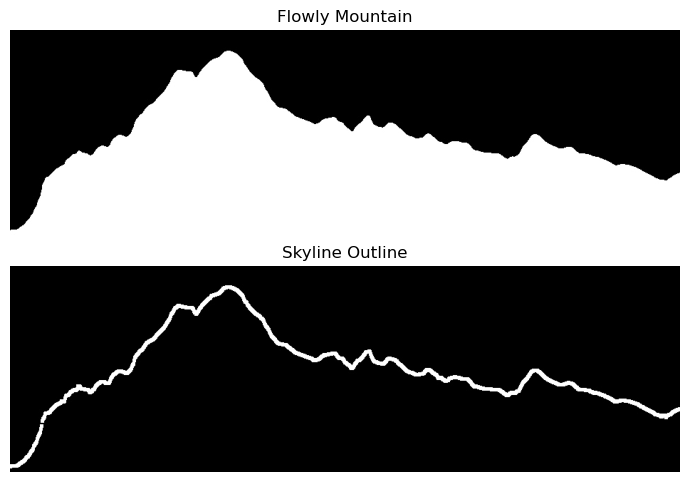

In [16]:
image_paths = [
    '/Users/Projects/flowly_mountain.jpg',
    '/Users/Projects/Skyline silhouette.jpg'
]

fig, axes = plt.subplots(2, 1, figsize=(7, 10))

# Loop through image paths, plot each image
for i, path in enumerate(image_paths):
    img = imread(path)
    axes[i].imshow(img, cmap='gray')  
    axes[i].axis('off')  
    
    if i == 0:
        axes[i].set_title('Flowly Mountain')
    else:
        axes[i].set_title('Skyline Outline')

plt.subplots_adjust(hspace=-0.9)
plt.tight_layout()
plt.show()